In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1.문제정의
- 전자상거래물품배송예측
- kaggle대회 높은 점수를 획득

# 2. 데이터 수집
- kaggle 사이트로부터 train,test수집

In [2]:
#train데이터 수집
train = pd.read_csv("smhrd210615/train.csv")
train.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,C,Ship,2.0,2,135,3.0,low,M,NaN,1339,1
1,2,F,Flight,5.0,3,225,5.0,low,F,6.0,1082,0
2,3,F,Ship,3.0,1,229,3.0,low,M,NaN,4971,1
3,4,F,Ship,3.0,2,228,NaN,medium,M,2.0,5640,0
4,5,D,Flight,NaN,1,195,6.0,high,F,NaN,4944,1


In [3]:
#test데이터 수집
test=pd.read_csv("smhrd210615/test.csv")
test.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
0,7000,F,Ship,3.0,1,274,NaN,high,M,NaN,4352
1,7001,F,Ship,3.0,4,136,2.0,medium,F,NaN,1056
2,7002,A,Flight,NaN,5,140,3.0,low,F,7.0,5383
3,7003,C,Ship,NaN,1,291,4.0,low,F,NaN,1880
4,7004,F,?,4.0,2,147,3.0,low,F,5.0,5174


# 3.데이터 전처리

In [4]:
# Id를 인덱스로 변경하기
# set_index
#train 
train = train.set_index("ID")
#test
test = test.set_index("ID")

In [5]:
print(train.shape)
print(test.shape)

(6999, 11)
(4000, 10)


In [6]:
#결측치 확인
train.info()
#Customer_care_calls,Prior_purchases,Discount_offered

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6999 entries, 1 to 6999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Warehouse_block      6999 non-null   object 
 1   Mode_of_Shipment     6999 non-null   object 
 2   Customer_care_calls  5423 non-null   float64
 3   Customer_rating      6999 non-null   int64  
 4   Cost_of_the_Product  6999 non-null   int64  
 5   Prior_purchases      6049 non-null   float64
 6   Product_importance   6999 non-null   object 
 7   Gender               6999 non-null   object 
 8   Discount_offered     3468 non-null   float64
 9   Weight_in_gms        6999 non-null   object 
 10  Reached.on.Time_Y.N  6999 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 656.2+ KB


In [7]:
#Warehouse_block - A,B,C,D,E와 같이 블록으로 나누어 진 큰 창고를 가지고 있다
#Mode_of_Shipment-배송방법
#Customer_care_calls-배송 조회를 위한 문의 전화수
#Customer_rating-고객평가
#Cost_of_the_Product -제품비용
#Prior_purchases- 이전 구매횟수
#Gender- 성별
#Discount_offered-특정 제품에 대해 제공되는 할인
#Weight_in_gms-무게
#Reached.on.Time_Y.N -정시도달
#Product_importance-제품중요도

In [8]:
#test결측치확인
test.info()
#Customer_care_calls,Prior_purchases,Discount_offered

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 7000 to 10999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Warehouse_block      4000 non-null   object 
 1   Mode_of_Shipment     4000 non-null   object 
 2   Customer_care_calls  3144 non-null   float64
 3   Customer_rating      4000 non-null   int64  
 4   Cost_of_the_Product  4000 non-null   int64  
 5   Prior_purchases      3633 non-null   float64
 6   Product_importance   4000 non-null   object 
 7   Gender               4000 non-null   object 
 8   Discount_offered     2085 non-null   float64
 9   Weight_in_gms        4000 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 343.8+ KB


In [9]:
#결측값 채우기
train['Customer_care_calls'].value_counts()

4.0    1756
3.0    1620
5.0    1147
6.0     496
2.0     287
7.0     117
Name: Customer_care_calls, dtype: int64

In [10]:
train.corr()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Reached.on.Time_Y.N
Customer_care_calls,1.000000,0.013420,0.047041,0.173709,-0.158465,-0.070266
Customer_rating,0.013420,1.000000,-0.001961,0.008217,-0.016456,0.011275
Cost_of_the_Product,0.047041,-0.001961,1.000000,0.028947,-0.139349,-0.012811
Prior_purchases,0.173709,0.008217,0.028947,1.000000,-0.081868,-0.065160
Discount_offered,-0.158465,-0.016456,-0.139349,-0.081868,1.000000,0.397393
Reached.on.Time_Y.N,-0.070266,0.011275,-0.012811,-0.065160,0.397393,1.000000


In [11]:
# 피벗테이블 프레임 만들자
pt1=train.pivot_table(values='Customer_care_calls',
                 index=['Reached.on.Time_Y.N','Gender'],
                 aggfunc='mean')
pt1

Customer_care_calls
Reached.on.Time_Y.N Gender                     
0                   F                  4.155615
                    M                  4.142346
1                   F                  3.978927
                    M                  3.996271

In [12]:
#전체적으로 상관관계가 낮았는데 그나마 높은게 정시도착이라 정시도착에 컬럼
#을 정하고 문의횟수가 성별과 연관있지 않을까 가설을 세워서 했다.
#결측치를 4로 채운 이유는 평균이 4근처에 있기 때문이다.

In [13]:
train['Customer_care_calls']=train['Customer_care_calls'].fillna(4)

In [14]:
test['Customer_care_calls']=test['Customer_care_calls'].fillna(4)

In [15]:
# train.drop('Customer_care_callse',axis=1,inplace=True)

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6999 entries, 1 to 6999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Warehouse_block      6999 non-null   object 
 1   Mode_of_Shipment     6999 non-null   object 
 2   Customer_care_calls  6999 non-null   float64
 3   Customer_rating      6999 non-null   int64  
 4   Cost_of_the_Product  6999 non-null   int64  
 5   Prior_purchases      6049 non-null   float64
 6   Product_importance   6999 non-null   object 
 7   Gender               6999 non-null   object 
 8   Discount_offered     3468 non-null   float64
 9   Weight_in_gms        6999 non-null   object 
 10  Reached.on.Time_Y.N  6999 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 656.2+ KB


In [17]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 7000 to 10999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Warehouse_block      4000 non-null   object 
 1   Mode_of_Shipment     4000 non-null   object 
 2   Customer_care_calls  4000 non-null   float64
 3   Customer_rating      4000 non-null   int64  
 4   Cost_of_the_Product  4000 non-null   int64  
 5   Prior_purchases      3633 non-null   float64
 6   Product_importance   4000 non-null   object 
 7   Gender               4000 non-null   object 
 8   Discount_offered     2085 non-null   float64
 9   Weight_in_gms        4000 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 343.8+ KB


In [18]:
#이전구매횟수 결측치채우기
train['Prior_purchases'].value_counts()

3.0     2176
2.0     1423
4.0     1162
5.0      735
6.0      310
10.0     101
8.0       72
7.0       70
Name: Prior_purchases, dtype: int64

In [19]:
train.corr()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Reached.on.Time_Y.N
Customer_care_calls,1.000000,0.012948,0.046959,0.152444,-0.140687,-0.062842
Customer_rating,0.012948,1.000000,-0.001961,0.008217,-0.016456,0.011275
Cost_of_the_Product,0.046959,-0.001961,1.000000,0.028947,-0.139349,-0.012811
Prior_purchases,0.152444,0.008217,0.028947,1.000000,-0.081868,-0.065160
Discount_offered,-0.140687,-0.016456,-0.139349,-0.081868,1.000000,0.397393
Reached.on.Time_Y.N,-0.062842,0.011275,-0.012811,-0.065160,0.397393,1.000000


In [20]:
#결측치를 3으로 채운이유는 3이 앞도적으로 많다고 봤기 때문이다.

In [21]:
train['Prior_purchases']=train['Prior_purchases'].fillna(3)

In [22]:
test['Prior_purchases']=test['Prior_purchases'].fillna(3)

In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6999 entries, 1 to 6999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Warehouse_block      6999 non-null   object 
 1   Mode_of_Shipment     6999 non-null   object 
 2   Customer_care_calls  6999 non-null   float64
 3   Customer_rating      6999 non-null   int64  
 4   Cost_of_the_Product  6999 non-null   int64  
 5   Prior_purchases      6999 non-null   float64
 6   Product_importance   6999 non-null   object 
 7   Gender               6999 non-null   object 
 8   Discount_offered     3468 non-null   float64
 9   Weight_in_gms        6999 non-null   object 
 10  Reached.on.Time_Y.N  6999 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 656.2+ KB


In [24]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 7000 to 10999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Warehouse_block      4000 non-null   object 
 1   Mode_of_Shipment     4000 non-null   object 
 2   Customer_care_calls  4000 non-null   float64
 3   Customer_rating      4000 non-null   int64  
 4   Cost_of_the_Product  4000 non-null   int64  
 5   Prior_purchases      4000 non-null   float64
 6   Product_importance   4000 non-null   object 
 7   Gender               4000 non-null   object 
 8   Discount_offered     2085 non-null   float64
 9   Weight_in_gms        4000 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 343.8+ KB


In [25]:
train.describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Reached.on.Time_Y.N
count,6999.000000,6999.000000,6999.000000,6999.000000,3468.000000,6999.000000
mean,4.042292,3.023718,214.249178,3.498071,13.269031,0.594656
std,0.995810,2.149861,208.294273,1.436854,16.070188,0.490993
min,2.000000,1.000000,96.000000,2.000000,1.000000,0.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,0.000000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,1.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,1.000000
max,7.000000,99.000000,9999.000000,10.000000,65.000000,1.000000


In [26]:
train.columns

Index(['Warehouse_block ', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

In [27]:
train['Warehouse_block '].unique()

array(['C', 'F', 'D', 'B', 'A'], dtype=object)

In [28]:
test['Warehouse_block '].unique()

array(['F', 'A', 'C', 'D', 'B'], dtype=object)

In [29]:
train['Mode_of_Shipment'].unique()

array([' Ship', ' Flight', ' Road', '?', ' Shipzk', ' Flightzk',
       ' Roadzk'], dtype=object)

In [30]:
test['Mode_of_Shipment'].unique()

array([' Ship', ' Flight', '?', ' Road', ' Shipzk', ' Roadzk'],
      dtype=object)

In [31]:
train['Mode_of_Shipment'].value_counts()

 Ship        4508
 Road        1075
 Flight      1039
?             373
 Shipzk         2
 Roadzk         1
 Flightzk       1
Name: Mode_of_Shipment, dtype: int64

In [32]:
for i in train['Mode_of_Shipment']:
    if(i=='Shipzk'):
        i.index()
    

In [33]:
#train라벨인코딩
Ship_Dictionary={
        " Ship":"Ship",
        " Road":"Road",
         " Flight":"Flight",
          " Shipzk":"Ship",
          "?":"?",
          " Roadzk":"Road",
         " Flightzk":"Flight"
    
 }
#shipzk,Roadzk,Flightzk는 이상치로 보고 Ship,Road,Flight로 수정

In [34]:
train['Mode_of_Shipment']=train['Mode_of_Shipment'].map(Ship_Dictionary)

In [35]:
train['Mode_of_Shipment'].value_counts()

Ship      4510
Road      1076
Flight    1040
?          373
Name: Mode_of_Shipment, dtype: int64

In [36]:
#test라벨인코딩
tShip_Dictionary={
    " Ship":"Ship",
    " Flight":"Flight",
    "?":"?",
    " Road":"Road",
    " Roadzk":"Road",
    " Shipzk":"Ship"
}
#Roadzk,Shipzk이상치를 Ship,Road로 변경

In [37]:
test['Mode_of_Shipment']=test['Mode_of_Shipment'].map(tShip_Dictionary)

In [38]:
 #Ship이 최빈값이라서 결측치에 채워줌
train['Mode_of_Shipment']=train['Mode_of_Shipment'].replace('?','Ship')
test['Mode_of_Shipment']=test['Mode_of_Shipment'].replace('?','Ship')

In [39]:
train['Mode_of_Shipment'].value_counts()

Ship      4883
Road      1076
Flight    1040
Name: Mode_of_Shipment, dtype: int64

In [40]:
test['Mode_of_Shipment'].value_counts()

Ship      2773
Flight     631
Road       596
Name: Mode_of_Shipment, dtype: int64

In [41]:
train['Customer_rating'].unique()
#99이상치 발견

array([ 2,  3,  1,  5,  4, 99], dtype=int64)

In [42]:
train['Customer_rating'].value_counts()

3     1451
2     1399
5     1399
1     1391
4     1357
99       2
Name: Customer_rating, dtype: int64

In [43]:
train.corr() #'Customer_rating'과 상관관계가 다 낮아서 유의미한 결과를 볼 수 없다.

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Reached.on.Time_Y.N
Customer_care_calls,1.000000,0.012948,0.046959,0.137079,-0.140687,-0.062842
Customer_rating,0.012948,1.000000,-0.001961,0.005057,-0.016456,0.011275
Cost_of_the_Product,0.046959,-0.001961,1.000000,0.029920,-0.139349,-0.012811
Prior_purchases,0.137079,0.005057,0.029920,1.000000,-0.075178,-0.057114
Discount_offered,-0.140687,-0.016456,-0.139349,-0.075178,1.000000,0.397393
Reached.on.Time_Y.N,-0.062842,0.011275,-0.012811,-0.057114,0.397393,1.000000


In [44]:
#이상치가 2개뿐이라서 최빈값 3으로 바꿈
train['Customer_rating']=train['Customer_rating'].replace(99,3)

In [45]:
train['Customer_rating'].value_counts()

3    1453
2    1399
5    1399
1    1391
4    1357
Name: Customer_rating, dtype: int64

In [46]:
test['Customer_rating'].unique()

array([ 1,  4,  5,  2,  3, 99], dtype=int64)

In [47]:
test['Customer_rating']=test['Customer_rating'].replace(99,3)

In [48]:
test['Customer_rating'].value_counts()

1    843
4    831
3    790
5    772
2    764
Name: Customer_rating, dtype: int64

In [49]:
train['Cost_of_the_Product'].unique()

array([ 135,  225,  229,  228,  195,  171,  282,  161,  274,  222,  264,
        196,  232,  194,  207,  146,  221,  134,  254,  160,  273,  142,
        224,  253,  209,  247,  239,  215,  177,  189,  139,  184,  121,
        133,  158,  286,  281,  261,  214,  180,  169,  280,  166,  172,
        212,  246,  154,  203,  296,  185,  249,  269,  213,  263,  267,
        164,  178,  268,  278,  141,  140,  241,  105,  197,  193,  231,
        237,  305,  210,  138,  226,  151,  309,  255,  152,  186,  136,
        244,  252,  111,  248, 9999,  202,  174,  272,  182,  181,  173,
        242,  294,  198,  208,  301,  270,  130,  259,  236,  250,  223,
        183,  148,  243,  262,  201,  199,  156,  145,  150,  132,  137,
        276,  256,  290,  200,  258,  170,  227,  240,  157,  165,  175,
        233,  289,  191,  277,  275,  190,  163,  266,  206,  217,  220,
        219,  218,  187,  298,  162,  295,  234,  176,  245,  238,  143,
        265,  112,  125,  128,  102,   97,  204,  2

In [50]:
train['Cost_of_the_Product'].describe()
#9999 이상치발견

count    6999.000000
mean      214.249178
std       208.294273
min        96.000000
25%       169.000000
50%       214.000000
75%       251.000000
max      9999.000000
Name: Cost_of_the_Product, dtype: float64

In [51]:
train['Cost_of_the_Product'].mean()

214.24917845406486

In [52]:
#이상치 9999를 평균 214로 바꿔준다.
train['Cost_of_the_Product']=train['Cost_of_the_Product'].replace(9999,214)

In [53]:
train['Cost_of_the_Product'].describe()

count    6999.000000
mean      210.055008
std        48.220091
min        96.000000
25%       169.000000
50%       214.000000
75%       251.000000
max       310.000000
Name: Cost_of_the_Product, dtype: float64

In [54]:
test['Cost_of_the_Product'].unique()

array([ 274,  136,  140,  291,  147,  221,  253,  244,  150,  175,  235,
        257,  204,  211,  258,  210,  226,  290,  148,  225,  206,  205,
        199,  247,  266,  133,  251,  220,  181,  209,  263,  152,  246,
        260,  178,  151,  256,  267,  229,  180,  238,  160,  241,  166,
        135,  167,  265,  149,  191,  216,  218,  170,  301,  208,  285,
        134,  156,  174,  185,  264,  245,  154,  213,  292,  217,  192,
        248,  270,  172,  142,  277,  255,  162,  139,  234,  239,  179,
        164,  232,  202,  143,  233,  165,  262,  138,  294,  271,  117,
        171,  252,  168,  173,  228,  254,  237,  144,  212,  289,  137,
        190,  201,  222,  159,  231,  223,  198,  269,  243,  293,  224,
        187,  115,  249,  193,  296,  189,  195, 9999,  275,  215,  242,
         98,  203,  188,  153,  129,  176,  141,  236,  163,  169,  118,
        119,  196,  250,  194,  182,  282,  184,  125,  286,  200,  273,
        219,  278,  207,  268,  186,  230,  121,  1

In [55]:
#이상치9999를 평균값214로 바꿔준다
test['Cost_of_the_Product']=test['Cost_of_the_Product'].replace(9999,214)

In [56]:
train['Product_importance'].unique()
#?,mediumm,loww,highh 결측치와 이상치 발견

array(['low', 'medium', 'high', '?', 'mediumm', 'loww', 'highh'],
      dtype=object)

In [57]:
train['Product_importance'].value_counts()

low        3344
medium     2982
high        573
?            97
loww          1
highh         1
mediumm       1
Name: Product_importance, dtype: int64

In [58]:
#결측치?는 최빈값 low로 채워주고 
# highh,mediumm,loww이상치들은 high,medium,low로 바꿔준다.
train['Product_importance']=train['Product_importance'].replace('?','low')
train['Product_importance']=train['Product_importance'].replace('highh','high')
train['Product_importance']=train['Product_importance'].replace('mediumm','medium')
train['Product_importance']=train['Product_importance'].replace('loww','low')

In [59]:
train['Product_importance'].value_counts()

low       3442
medium    2983
high       574
Name: Product_importance, dtype: int64

In [60]:
test['Product_importance'].unique()

array(['high', 'medium', 'low', '?', 'mediumm'], dtype=object)

In [61]:
#결측치?는 최빈값 low로 채워주고 
# highh,mediumm,loww이상치들은 high,medium,low로 바꿔준다.
test['Product_importance']=test['Product_importance'].replace('?','low')
test['Product_importance']=test['Product_importance'].replace('highh','high')
test['Product_importance']=test['Product_importance'].replace('mediumm','medium')
test['Product_importance']=test['Product_importance'].replace('loww','low')

In [62]:
test['Product_importance'].value_counts()

low       1953
medium    1686
high       361
Name: Product_importance, dtype: int64

In [63]:
train['Weight_in_gms'].unique()

array(['1339', '1082', '4971', ..., '4075', '2486', '1480'], dtype=object)

In [64]:
test['Weight_in_gms'].unique()

array(['4352', '1056', '5383', ..., '3255', '1206', '3869'], dtype=object)

In [65]:
train['Weight_in_gms'].describe()
#top 최빈값 ?

count     6999
unique    3332
top          ?
freq       446
Name: Weight_in_gms, dtype: object

In [66]:
train['Weight_in_gms'].value_counts()
# 결측치 ? 발견

?       446
1367      8
1817      8
5208      7
4195      7
       ... 
5518      1
3124      1
4290      1
1271      1
1316      1
Name: Weight_in_gms, Length: 3332, dtype: int64

In [67]:
# test['Weight_in_gms'].value_counts()

In [68]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6999 entries, 1 to 6999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Warehouse_block      6999 non-null   object 
 1   Mode_of_Shipment     6999 non-null   object 
 2   Customer_care_calls  6999 non-null   float64
 3   Customer_rating      6999 non-null   int64  
 4   Cost_of_the_Product  6999 non-null   int64  
 5   Prior_purchases      6999 non-null   float64
 6   Product_importance   6999 non-null   object 
 7   Gender               6999 non-null   object 
 8   Discount_offered     3468 non-null   float64
 9   Weight_in_gms        6999 non-null   object 
 10  Reached.on.Time_Y.N  6999 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 656.2+ KB


In [69]:
train.corr()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Reached.on.Time_Y.N
Customer_care_calls,1.000000,0.010797,0.293898,0.137079,-0.140687,-0.062842
Customer_rating,0.010797,1.000000,0.006108,0.014454,-0.016456,0.001127
Cost_of_the_Product,0.293898,0.006108,1.000000,0.119035,-0.139349,-0.068100
Prior_purchases,0.137079,0.014454,0.119035,1.000000,-0.075178,-0.057114
Discount_offered,-0.140687,-0.016456,-0.139349,-0.075178,1.000000,0.397393
Reached.on.Time_Y.N,-0.062842,0.001127,-0.068100,-0.057114,0.397393,1.000000


In [70]:
train['Discount_offered'].unique()

array([nan,  6.,  2.,  9.,  3., 34.,  7.,  1., 53.,  8., 63.,  4., 43.,
       60., 51.,  5., 10., 55., 17., 62., 15., 23., 38., 32., 39., 29.,
       45., 14., 52., 41., 58., 11., 50., 35., 28., 31., 24., 64., 61.,
       48., 65., 40., 18., 22., 56., 49., 21., 27., 20., 13., 30., 26.,
       54., 16., 57., 47., 42., 36., 37., 46., 19., 12., 25., 44., 33.,
       59.])

In [71]:
train['Discount_offered'].unique()

array([nan,  6.,  2.,  9.,  3., 34.,  7.,  1., 53.,  8., 63.,  4., 43.,
       60., 51.,  5., 10., 55., 17., 62., 15., 23., 38., 32., 39., 29.,
       45., 14., 52., 41., 58., 11., 50., 35., 28., 31., 24., 64., 61.,
       48., 65., 40., 18., 22., 56., 49., 21., 27., 20., 13., 30., 26.,
       54., 16., 57., 47., 42., 36., 37., 46., 19., 12., 25., 44., 33.,
       59.])

In [72]:
#특정제품에 제공되는 활인율에 결측치를 
#활인이 안된 상품으로 가정해서 
#결측치에 0을 넣겠다.
train['Discount_offered']=train['Discount_offered'].fillna(0)

In [73]:
train['Discount_offered'].value_counts()

0.0     3531
9.0      287
10.0     278
2.0      278
3.0      277
        ... 
50.0      10
18.0      10
42.0       9
26.0       8
43.0       7
Name: Discount_offered, Length: 66, dtype: int64

In [74]:
test['Discount_offered']=test['Discount_offered'].fillna(0)

In [75]:
test['Discount_offered'].value_counts()

0.0     1915
3.0      171
7.0      170
5.0      169
6.0      166
        ... 
58.0       4
30.0       4
55.0       4
34.0       3
65.0       2
Name: Discount_offered, Length: 66, dtype: int64

In [76]:
train['Prior_purchases'].unique()

array([ 3.,  5.,  6.,  4., 10.,  2.,  7.,  8.])

In [77]:
train.describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Reached.on.Time_Y.N
count,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000
mean,4.042292,2.996285,210.055008,3.498071,6.574796,0.594656
std,0.995810,1.410161,48.220091,1.436854,13.113507,0.490993
min,2.000000,1.000000,96.000000,2.000000,0.000000,0.000000
25%,3.000000,2.000000,169.000000,3.000000,0.000000,0.000000
50%,4.000000,3.000000,214.000000,3.000000,0.000000,1.000000
75%,5.000000,4.000000,251.000000,4.000000,7.000000,1.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,1.000000


In [78]:
train.corr()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Reached.on.Time_Y.N
Customer_care_calls,1.000000,0.010797,0.293898,0.137079,-0.093246,-0.062842
Customer_rating,0.010797,1.000000,0.006108,0.014454,-0.010548,0.001127
Cost_of_the_Product,0.293898,0.006108,1.000000,0.119035,-0.080011,-0.068100
Prior_purchases,0.137079,0.014454,0.119035,1.000000,-0.045471,-0.057114
Discount_offered,-0.093246,-0.010548,-0.080011,-0.045471,1.000000,0.242017
Reached.on.Time_Y.N,-0.062842,0.001127,-0.068100,-0.057114,0.242017,1.000000


In [79]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6999 entries, 1 to 6999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Warehouse_block      6999 non-null   object 
 1   Mode_of_Shipment     6999 non-null   object 
 2   Customer_care_calls  6999 non-null   float64
 3   Customer_rating      6999 non-null   int64  
 4   Cost_of_the_Product  6999 non-null   int64  
 5   Prior_purchases      6999 non-null   float64
 6   Product_importance   6999 non-null   object 
 7   Gender               6999 non-null   object 
 8   Discount_offered     6999 non-null   float64
 9   Weight_in_gms        6999 non-null   object 
 10  Reached.on.Time_Y.N  6999 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 656.2+ KB


# 4.탐색적 데이터 분석(EDA)
- 시각화를 통해서 컬럼을 분석

In [80]:
#물품이 중요할 수록 정시도착을 한다는 가설
#운송수단에 따라서 정시도착을 한다는 가설
#활인율에 따라서 정시도착한다는 가설

<AxesSubplot:xlabel='Mode_of_Shipment', ylabel='count'>

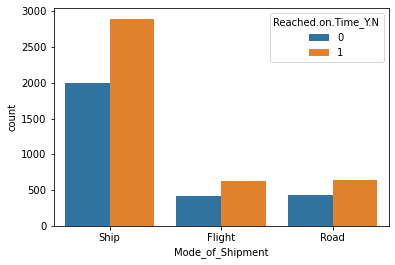

In [81]:
sns.countplot(data=train,
             x='Mode_of_Shipment',
             hue='Reached.on.Time_Y.N')

In [82]:
#1은 정시에 도달하지 않음 0은 정시에 도달함을 예측한 것이다.
#운송수단 전부다 정시에 도착하지 않았다는 것을 볼 수 있다.

<AxesSubplot:xlabel='Product_importance', ylabel='count'>

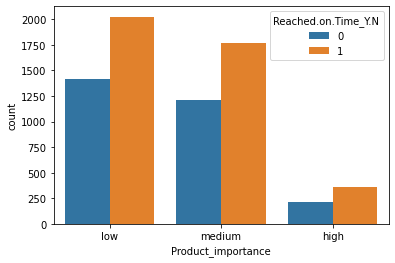

In [83]:
sns.countplot(data=train,
             x='Product_importance',
             hue='Reached.on.Time_Y.N')

In [84]:
#물품중요도와는 상관없이 정시에 도착하지 않았다는 것을 볼 수 있다.

In [85]:
#활인율을 범주형으로 만들자
#0 : 활인적용x zero
#1~20: 낮은 활인적용 low
#21~40: 중간활인적용 mid
#41~65: 높은 활인적용 high
#pd.cut - 카테고리 데이터를 범주형으로 만드는 작업
# bins = [-1,0,20,40,65] # 범주형의 범위 지정(초과,이하)
# labels = ['zero','low','mid','high'] #범주형에 달아줄 이름
# train['Discount_offered']=pd.cut(train['Discount_offered'],bins = bins,labels=labels)

In [86]:
# train['Discount_offered'].unique()

In [87]:
# train['Discount_offered'].value_counts()

In [88]:
# bol = train['Discount_offered'] is Nan

In [89]:
# train['Discount_offered'].replace('NaN', 0, inplace=True)
# train['Discount_offered']

In [90]:
# train['Discount_offered'][3] == 'NaN'

In [91]:
# sns.countplot(data=train,x='Discount_offered',hue='Reached.on.Time_Y.N')

In [92]:
# bins = [-1,0,20,40,65] # 범주형의 범위 지정(초과,이하)
# labels = ['zero','low','mid','high'] #범주형에 달아줄 이름
# test['Discount_offered']=pd.cut(test['Discount_offered'],bins = bins,labels=labels)

In [93]:
#1~10까지 낮은 활인을 적용받은 상품이 많고 
#zero일때 정시도착을 한다.

In [94]:
# train['Cost_of_the_Product'].describe()

In [95]:

# pd.cut - 카테고리 데이터를 범주형으로 만드는 작업
# bins = [95,169,214,251] # 범주형의 범위 지정(초과,이하)
# labels = ['25%','50%','75%'] #범주형에 달아줄 이름
# train['Cost_of_the_Product']=pd.cut(train['Cost_of_the_Product'],bins = bins,labels=labels)

In [96]:
# sns.countplot(data=train,x='Cost_of_the_Product',hue='Reached.on.Time_Y.N')

In [97]:
# bins = [95,169,214,251] # 범주형의 범위 지정(초과,이하)
# labels = ['25%','50%','75%'] #범주형에 달아줄 이름
# test['Cost_of_the_Product']=pd.cut(test['Cost_of_the_Product'],bins = bins,labels=labels)

In [98]:
#가격에 따른 정시도착과의 연관성을 못찾았다.

In [99]:
#Weight_in_gms삭제
#유의미한 결과를 출력하기 힘들것이라고 판단해서
train.drop('Weight_in_gms',axis=1,inplace=True)
test.drop('Weight_in_gms',axis=1,inplace=True)

In [100]:
train.columns

Index(['Warehouse_block ', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered',
       'Reached.on.Time_Y.N'],
      dtype='object')

In [101]:
#one-hot 인코딩
#수치가 아닌 컬럼들만 원핫인코딩진행해준다.
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6999 entries, 1 to 6999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Warehouse_block      6999 non-null   object 
 1   Mode_of_Shipment     6999 non-null   object 
 2   Customer_care_calls  6999 non-null   float64
 3   Customer_rating      6999 non-null   int64  
 4   Cost_of_the_Product  6999 non-null   int64  
 5   Prior_purchases      6999 non-null   float64
 6   Product_importance   6999 non-null   object 
 7   Gender               6999 non-null   object 
 8   Discount_offered     6999 non-null   float64
 9   Reached.on.Time_Y.N  6999 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 921.5+ KB


In [102]:
train.columns

Index(['Warehouse_block ', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered',
       'Reached.on.Time_Y.N'],
      dtype='object')

In [103]:
onehot_columns=['Warehouse_block ','Mode_of_Shipment','Product_importance','Gender']

In [104]:
for col in onehot_columns:
    dummy = pd.get_dummies(train[col],prefix=col)
    train = pd.concat([train,dummy],axis=1)
    train.drop(col,axis=1,inplace=True)

In [105]:
for col in onehot_columns:
     dummy = pd.get_dummies(test[col],prefix=col)
     test = pd.concat([test,dummy],axis=1)
     test.drop(col,axis=1,inplace=True)

In [106]:
print(train.shape)
print(test.shape)

(6999, 19)
(4000, 18)


In [107]:
#train에는 있고 test에는 없는것
set(train.columns)-set(test.columns)

{'Reached.on.Time_Y.N'}

In [108]:
#test에는 있고 train에는 없는 것
set(test.columns)-set(train.columns)

set()

# 5.모델선택 및 하이퍼파라미터 튜닝

In [109]:
# 훈련 / 평가 데이터를 -train, test
# 문제와 정답으로 분리 -ㅌX,y
#X_train,y_train,X_test
X_train=train.drop('Reached.on.Time_Y.N',axis=1)
y_train=train['Reached.on.Time_Y.N']
X_test=test.copy()

In [110]:
X_train.shape,X_test.shape,y_train.shape

((6999, 18), (4000, 18), (6999,))

In [111]:
# DecisionTree
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=4)

In [112]:
X_train.isnull().sum() # 결측치가 있어요 ㅠㅠㅠ

Customer_care_calls          0
Customer_rating              0
Cost_of_the_Product          0
Prior_purchases              0
Discount_offered             0
Warehouse_block _A           0
Warehouse_block _B           0
Warehouse_block _C           0
Warehouse_block _D           0
Warehouse_block _F           0
Mode_of_Shipment_Flight      0
Mode_of_Shipment_Road        0
Mode_of_Shipment_Ship        0
Product_importance_high      0
Product_importance_low       0
Product_importance_medium    0
Gender_F                     0
Gender_M                     0
dtype: int64

In [113]:
X_train['Discount_offered'] # 채워줘야 모델 돌릴 수 있을 것 같아요! 감사합니다

ID
1        0.0
2        6.0
3        0.0
4        2.0
5        0.0
        ... 
6995     4.0
6996     0.0
6997    10.0
6998     0.0
6999     0.0
Name: Discount_offered, Length: 6999, dtype: float64

In [114]:
y_train.isnull().sum()

0

In [115]:
# #교차검증
from sklearn.model_selection import cross_val_score
result = cross_val_score(tree,X_train,y_train,cv=5)
result.mean()

0.6126616971306035

In [116]:
# 오류에서 nan 이라고 나오면 결측치가 있다는 뜻이에요

# 6.학습

In [117]:
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4)

# 7.평가

In [118]:
tree.score(X_train,y_train)

0.6243749107015288

In [119]:
pre=tree.predict(X_test)
result = pd.read_csv('smhrd210615/sampleSubmission.csv')
result['Reached.on.Time_Y.N']=pre
result.to_csv('DT_esubmissoin_01.csv',index=False)

# 5-1
- RandomForest

In [120]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()

# 6-1

In [121]:
forest.fit(X_train,y_train)

RandomForestClassifier()

# 7-1

In [122]:
forest.score(X_train,y_train)

0.9977139591370195

In [123]:
pre=forest.predict(X_test)
result = pd.read_csv('smhrd210615/sampleSubmission.csv')
result['Reached.on.Time_Y.N']=pre
result.to_csv('forest4_esubmissoin_01.csv',index=False)

# 5-2
- KNN

In [124]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

In [125]:
# #교차검증
result = cross_val_score(knn,X_train,y_train,cv=5)
result.mean()

0.5695122025936893

In [126]:
# # standardScaler받아오기
from sklearn.preprocessing import StandardScaler

In [127]:
scaler = StandardScaler()

In [128]:
# 범위 학습
scaler.fit(X_train)

StandardScaler()

In [129]:
X_train.head()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Warehouse_block _A,Warehouse_block _B,Warehouse_block _C,Warehouse_block _D,Warehouse_block _F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_high,Product_importance_low,Product_importance_medium,Gender_F,Gender_M
ID,,,,,,,,,,,,,,,,,,
1,2.0,2,135,3.0,0.0,0,0,1,0,0,0,0,1,0,1,0,0,1
2,5.0,3,225,5.0,6.0,0,0,0,0,1,1,0,0,0,1,0,1,0
3,3.0,1,229,3.0,0.0,0,0,0,0,1,0,0,1,0,1,0,0,1
4,3.0,2,228,3.0,2.0,0,0,0,0,1,0,0,1,0,0,1,0,1
5,4.0,1,195,6.0,0.0,0,0,0,1,0,1,0,0,1,0,0,1,0


In [130]:
# #학습된 범위로 값 변환
trans_X_train=scaler.transform(X_train)
trans_X_test=scaler.transform(X_test)

In [131]:
result = cross_val_score(knn,trans_X_train,y_train,cv=5)
result.mean()

0.5406476054324518

# 6-2

In [132]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

# 7-2

In [133]:
knn.score(X_train,y_train)

0.7785397913987713

In [134]:
pre=knn.predict(X_test)
result = pd.read_csv('smhrd210615/sampleSubmission.csv')
result['Reached.on.Time_Y.N']=pre
result.to_csv('knn2_esubmissoin_01.csv',index=False)

In [135]:
train_list=[]
for k in range(1,101): # k: 이웃의 수
    # 5. 모델 선택 및 하이퍼 파라미터 튜닝
    model = KNeighborsClassifier(n_neighbors=k)
    
    # 6. 모델 학습
    model.fit(X_train,y_train) 
    
    # 7. 모델 평가
    train_list.append(model.score(X_train,y_train))

In [136]:
train_list

[0.9977139591370195,
 0.7846835262180312,
 0.7785397913987713,
 0.7241034433490499,
 0.728818402628947,
 0.7095299328475496,
 0.7056722388912702,
 0.6953850550078583,
 0.696813830547221,
 0.6803829118445492,
 0.682811830261466,
 0.6752393199028432,
 0.6728104014859265,
 0.6672381768824118,
 0.6679525646520932,
 0.6635233604800685,
 0.6645235033576226,
 0.6598085440777254,
 0.6598085440777254,
 0.6576653807686812,
 0.6576653807686812,
 0.6572367481068724,
 0.6550935847978283,
 0.6528075439348479,
 0.6535219317045292,
 0.6529504214887841,
 0.6505215030718674,
 0.6478068295470781,
 0.6462351764537791,
 0.6473781968852693,
 0.6445206458065438,
 0.6459494213459066,
 0.6423774824974996,
 0.642091727389627,
 0.6443777682526075,
 0.6408058294042006,
 0.644092013144735,
 0.6436633804829262,
 0.644092013144735,
 0.6436633804829262,
 0.6452350335762251,
 0.6400914416345193,
 0.6463780540077154,
 0.6409487069581369,
 0.6412344620660094,
 0.639948564080583,
 0.6369481354479212,
 0.6395199314187741,

# 5-3
- adaboost

In [137]:
from sklearn.ensemble import AdaBoostClassifier

In [138]:
adaboost = AdaBoostClassifier()

# 6-4

In [139]:
adaboost.fit(X_train,y_train)

AdaBoostClassifier()

In [140]:
adaboost.score(X_train,y_train)

0.6258036862408916

In [141]:
pre=adaboost.predict(X_test)
result = pd.read_csv('smhrd210615/sampleSubmission.csv')
result['Reached.on.Time_Y.N']=pre
result.to_csv('adaboost_esubmissoin_01.csv',index=False)

# 5-4 
- GradientBoosting

In [142]:
from sklearn.ensemble import GradientBoostingClassifier
gdc = GradientBoostingClassifier()

# 6-5

In [143]:
gdc.fit(X_train,y_train)

GradientBoostingClassifier()

In [144]:
gdc.score(X_train,y_train)

0.6596656665237891

In [145]:
pre=gdc.predict(X_test)
result = pd.read_csv('smhrd210615/sampleSubmission.csv')
result['Reached.on.Time_Y.N']=pre
result.to_csv('gdc_esubmissoin_01.csv',index=False)

# 5-6
- Light GBM

In [146]:
!pip install lightgbm

In [147]:
from lightgbm import LGBMClassifier

In [148]:
lgb = LGBMClassifier()

# 6-6

In [149]:
lgb.fit(X_train,y_train)

LGBMClassifier()

# 7-6

In [150]:
lgb.score(X_train,y_train)

0.7721103014716388

In [151]:
pre=lgb.predict(X_test)
result = pd.read_csv('smhrd210615/sampleSubmission.csv')
result['Reached.on.Time_Y.N']=pre
result.to_csv('lgb_esubmissoin_01.csv',index=False)

# 5-7
- xgboost

In [152]:
!pip install xgboost

In [153]:
from xgboost import XGBClassifier

In [154]:
xgb= XGBClassifier()

# 6-7

In [155]:
xgb.fit(X_train,y_train)

[10:18:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\SM2127\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=16, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [156]:
xgb.score(X_train,y_train)

0.8485497928275468

In [157]:
pre=xgb.predict(X_test)
result = pd.read_csv('smhrd210615/sampleSubmission.csv')
result['Reached.on.Time_Y.N']=pre
result.to_csv('xgb_esubmissoin_01.csv',index=False)

In [158]:
X_train.shape

(6999, 18)

In [159]:
#GridSearch
# from sklearn.model_selection import GridSearchCV

In [160]:
# param_grid={
#      'max_depth' : [5,10,15,20], #트리의 깊이
#      'n_estimators' :[1000,1500,2000,2500], #생성할 트리의 개수
#      'max_features' : [0.5, 0.7], #무작위로 선택될 후보 특성의 개수
#      'max_leaf_nodes' : [20,50,80], #말단 노드 최대 개수
#      'min_samples_leaf' : [10,15,20] #말단 노드가 되기 위한 최소 샘플 수
#  }

In [161]:
# grid=GridSearchCV(forest, #gridSearch에 사용할 모델
#                   param_grid, #튜닝할 매개변수
#                   cv=5, #k겹 교차검증
#                   verbose=3 #현재 진행중인 학습 열람
#                   )

In [162]:
# grid.fit(X_train,y_train)

In [163]:
# print("최적의 파라미터: ",grid.best_params_)
# print("최고 예측 점수: ",grid.best_score_)